# USDA Crop Data — Exploratory Data Analysis
This notebook performs an initial exploratory analysis of the processed USDA dataset.

## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("default")

## 2. Load Dataset

In [2]:
df = pd.read_csv("/home/emanuel/usda-etl-pipeline/data/processed/usda_processed.csv")
df.head()

,year,state_name,commodity_desc,statisticcat_desc,unit_desc,value
0,2025,IOWA,CORN,PRICE RECEIVED,$ / BU,4.37
1,2025,IOWA,CORN,PRICE RECEIVED,$ / BU,4.59
2,2025,IOWA,CORN,PRICE RECEIVED,$ / BU,4.53
3,2025,IOWA,CORN,PRICE RECEIVED,$ / BU,4.64
4,2025,IOWA,CORN,PRICE RECEIVED,$ / BU,4.64


## 3. Inspect Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2435 entries, 0 to 2434
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               2435 non-null   int64  
 1   state_name         2435 non-null   object 
 2   commodity_desc     2435 non-null   object 
 3   statisticcat_desc  2435 non-null   object 
 4   unit_desc          2435 non-null   object 
 5   value              2435 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 114.3+ KB


## 4. Clean Dataset

In [4]:
df = df.dropna(subset=["value"])
df.describe()

,year,value
count,2435.000000,2.435000e+03
mean,2022.358111,2.848471e+08
std,1.640406,1.192730e+09
min,2020.000000,1.000000e+00
25%,2021.000000,6.200000e+00
50%,2022.000000,1.250000e+01
75%,2024.000000,2.000000e+02
max,2025.000000,1.635140e+10


## 5. Average Price Received per Year (by Commodity)

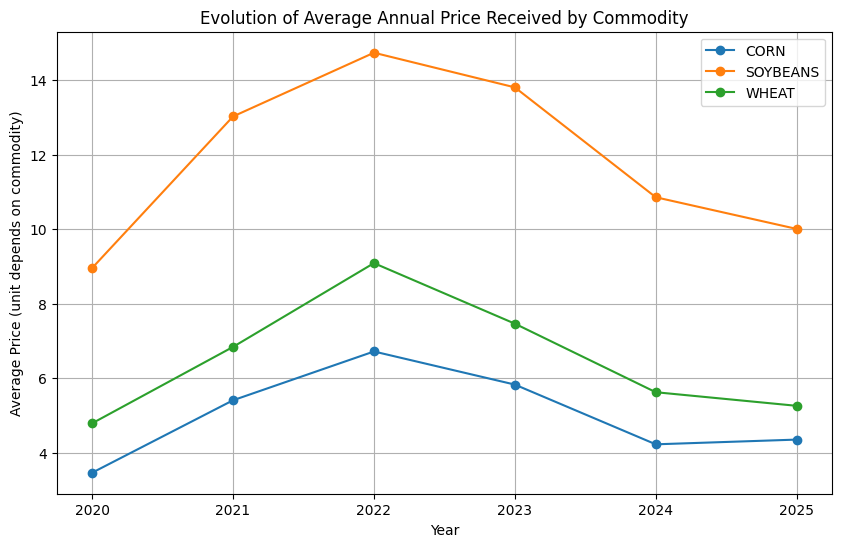

In [10]:
price_df = df[df["statisticcat_desc"] == "PRICE RECEIVED"]

avg_price = (
    price_df.groupby(["year", "commodity_desc"])["value"]
    .mean()
    .reset_index()
)

plt.figure(figsize=(10, 6))
for commodity in avg_price["commodity_desc"].unique():
    subset = avg_price[avg_price["commodity_desc"] == commodity]
    plt.plot(subset["year"], subset["value"], marker="o", label=commodity)

plt.title("Evolution of Average Annual Price Received by Commodity")
plt.xlabel("Year")
plt.ylabel("Average Price (unit depends on commodity)")
plt.legend()
plt.grid(True)
plt.show()


### Insight
The price evolution shows that each commodity follows its own market dynamics:  
some maintain relatively stable prices across years, while others display more pronounced volatility.  
These differences reflect factors such as production variability, export demand, and global market conditions.  
Overall, the chart highlights that commodity prices do not move uniformly and each product has its own behavior over time.

## 6. Production Over Time by Commodity

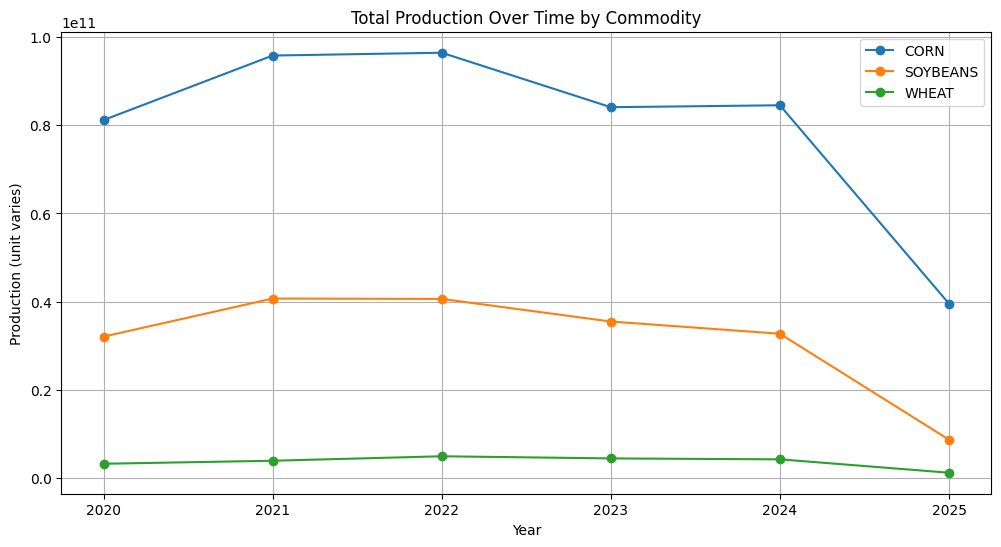

In [13]:
prod_df = df[df["statisticcat_desc"] == "PRODUCTION"]

commodity_prod = (
    prod_df.groupby(["year", "commodity_desc"])["value"]
    .sum()
    .reset_index()
)

plt.figure(figsize=(12, 6))

for commodity in commodity_prod["commodity_desc"].unique():
    subset = commodity_prod[commodity_prod["commodity_desc"] == commodity]
    plt.plot(subset["year"], subset["value"], marker="o", label=commodity)

plt.title("Total Production Over Time by Commodity")
plt.xlabel("Year")
plt.ylabel("Production (unit varies)")
plt.legend()
plt.grid(True)
plt.show()


### Insight
Different crops show different production trends over time. Some commodities grow steadily, while others fluctuate. This helps identify major agricultural products and long-term production cycles.

## 7. Top States by Total Production

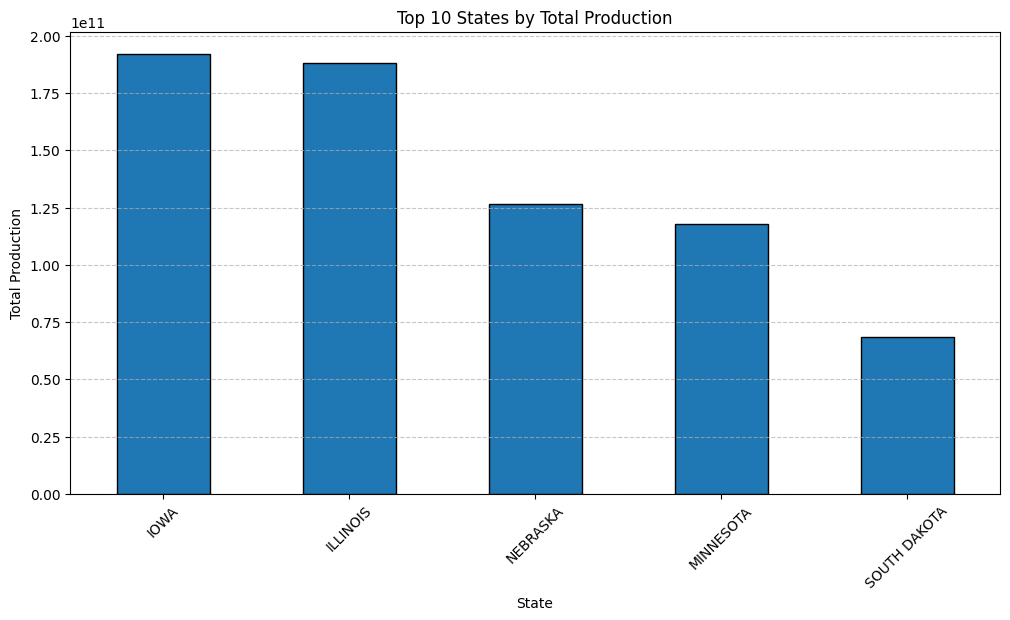

In [14]:
state_prod = (
    prod_df.groupby("state_name")["value"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
)

plt.figure(figsize=(12, 6))
state_prod.plot(kind="bar", edgecolor="black")

plt.title("Top 10 States by Total Production")
plt.xlabel("State")
plt.ylabel("Total Production")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


### Insight
A small group of states accounts for most of the production. These leaders correspond to well-known agricultural regions.